# Lab morning - Tuesday

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# Opening the file, renaming columns, general visualization

In [3]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
cols=data.columns
cols

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
cols=list(map(lambda x: x.lower(),cols))
cols

['customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size']

In [6]:
cols=list(map(lambda x: x.replace(' ','_'), cols))
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [7]:
data.columns=cols
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
data.shape

(9134, 24)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [10]:
data = data.rename(columns={"customer": "customer_id"})
data.set_index("customer_id",inplace=True)

In [11]:
data.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
data.eq(' ').sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Open the categoricals variable we created before.

In [13]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [14]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              9134 non-null   object
 1   response           9134 non-null   object
 2   coverage           9134 non-null   object
 3   education          9134 non-null   object
 4   effective_to_date  9134 non-null   object
 5   employmentstatus   9134 non-null   object
 6   gender             9134 non-null   object
 7   location_code      9134 non-null   object
 8   marital_status     9134 non-null   object
 9   policy_type        9134 non-null   object
 10  policy             9134 non-null   object
 11  renew_offer_type   9134 non-null   object
 12  sales_channel      9134 non-null   object
 13  vehicle_class      9134 non-null   object
 14  vehicle_size       9134 non-null   object
dtypes: object(15)
memory usage: 1.1+ MB


## Plot all the categorical variables with the proper plot. What can you see?

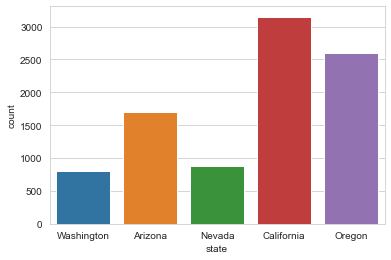

<Figure size 1440x1080 with 0 Axes>

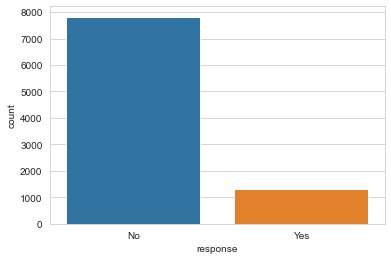

<Figure size 1440x1080 with 0 Axes>

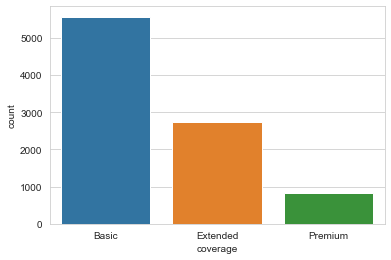

<Figure size 1440x1080 with 0 Axes>

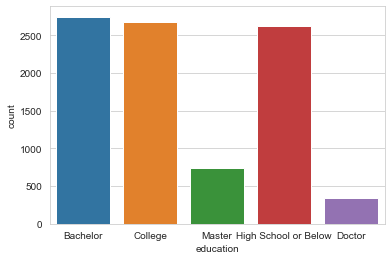

<Figure size 1440x1080 with 0 Axes>

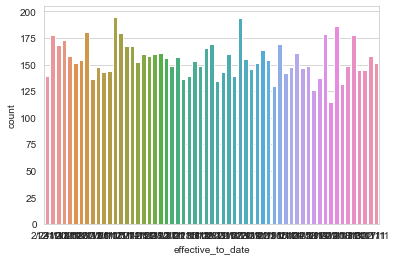

<Figure size 1440x1080 with 0 Axes>

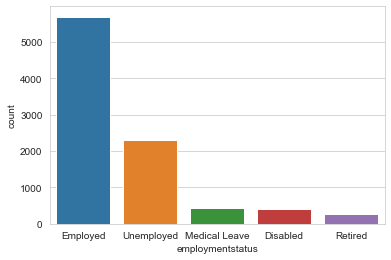

<Figure size 1440x1080 with 0 Axes>

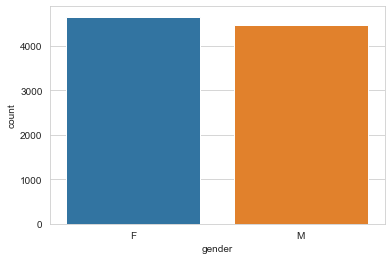

<Figure size 1440x1080 with 0 Axes>

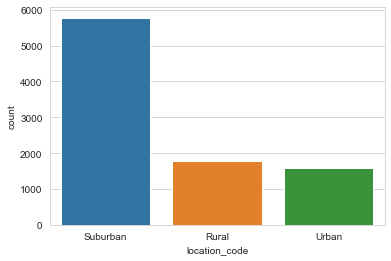

<Figure size 1440x1080 with 0 Axes>

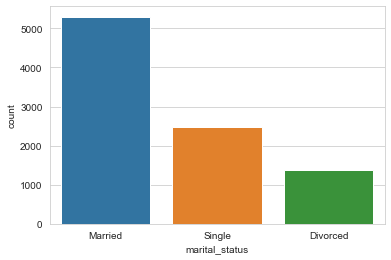

<Figure size 1440x1080 with 0 Axes>

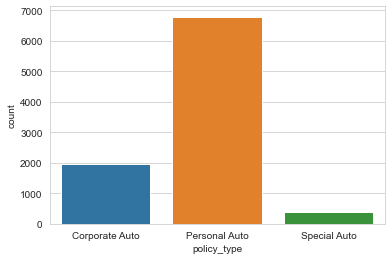

<Figure size 1440x1080 with 0 Axes>

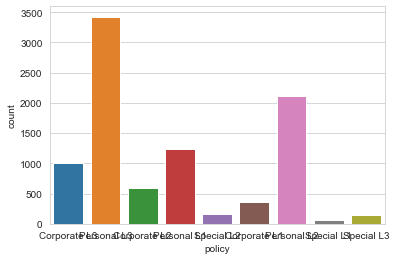

<Figure size 1440x1080 with 0 Axes>

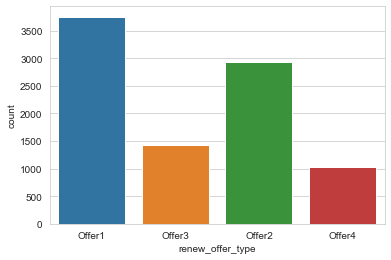

<Figure size 1440x1080 with 0 Axes>

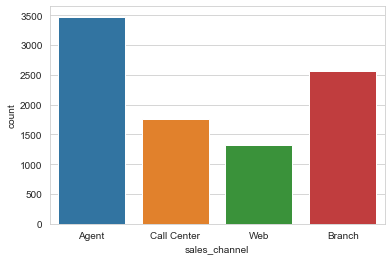

<Figure size 1440x1080 with 0 Axes>

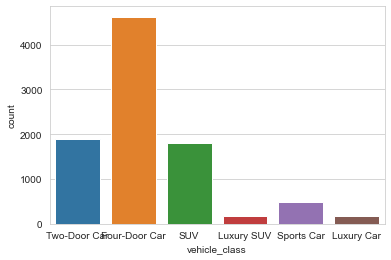

<Figure size 1440x1080 with 0 Axes>

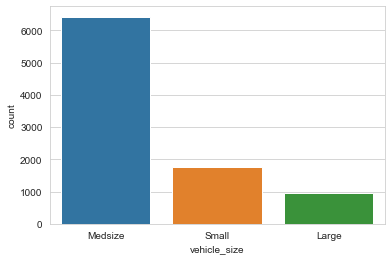

<Figure size 1440x1080 with 0 Axes>

In [15]:
for i in categoricals.columns:
    plt.subplot()
    sns.countplot(x=i, data=categoricals)
    plt.figure(figsize=(20,15))
    plt.show()

In [16]:
# There are many different classes for Policy - perhaps some binning can be useful for encoding.
# There are some columns that seem redundant.

## There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [17]:
# There are some columns that seem redundant. 
# Do we care about class imbalance since the dependent variable is "total_claim_amount"?

## Plot time variable. Can you extract something from it?

In [18]:
#customer_df2=customer_df
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

#customer_df2.columns = customer_df.columns.str.upper()
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [19]:
# Can check how many entries in a month/week/day:

#customer_df['date']=customer_df['effective_to_date'].dt.month
data['week'] = data['effective_to_date'].apply(lambda x: x.week)

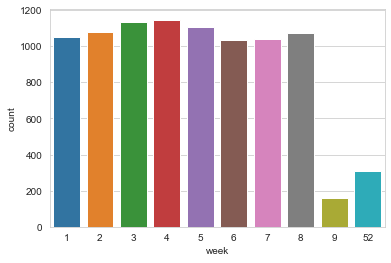

In [20]:
#customer_df = customer_df.sort_values('week', ascending=True)
sns.countplot(data['week'])
plt.show()

In [21]:
data['day'] = data['effective_to_date'].apply(lambda x: x.day)

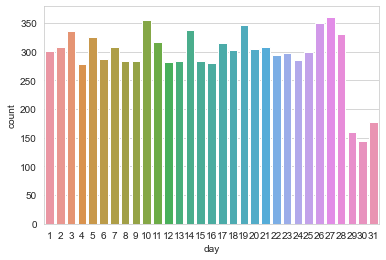

In [22]:
sns.countplot(data['day'])
plt.show()

In [23]:
#customer_df['month']=customer_df['effective_to_date'].dt.month
date_labels = list(range(1,31,1))
data['day'] = pd.cut(data['day'],30, labels=date_labels)

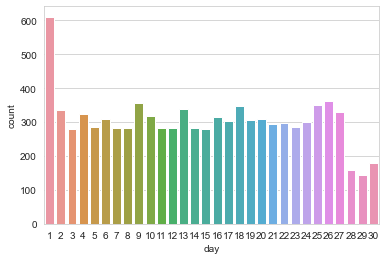

In [24]:
sns.countplot(data['day'])
plt.show()

In [25]:
week_labels = list(range(1,5,1))
data['week'] = pd.cut(data['day'],4, labels=week_labels)

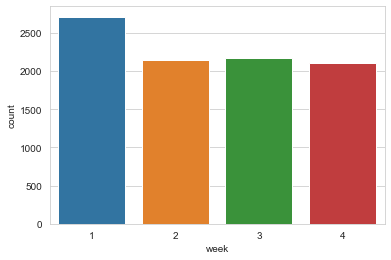

In [26]:
sns.countplot(data['week'])
plt.show()

# Lab afternoon - Data cleaning and wrangling

## We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [27]:
continuous_df=data[["customer_lifetime_value", "income", "total_claim_amount", "monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception"]]

In [28]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk))

In [29]:
skew_df(continuous_df)

the skew of customer_lifetime_value is: 3.032280259929985
the skew of income is: 0.28688727581189166
the skew of total_claim_amount is: 1.7149658097209557
the skew of monthly_premium_auto is: 2.1235464499475345
the skew of months_since_last_claim is: 0.2785863118107981
the skew of months_since_policy_inception is: 0.040164961597799524


In [30]:
# customer_lifetime_value is positively skewed - I decided to apply a log transformation

In [31]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [32]:
continuous_df["log_customer_lifetime_value"] = list(map(log_transfom_clean_, continuous_df["customer_lifetime_value"]))

In [33]:
continuous_df["log_customer_lifetime_value"].isna().sum()

0

In [34]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,log_customer_lifetime_value
customer_id,,,,,,,
BU79786,2763.519279,56274,384.811147,69,32,5,7.924260
QZ44356,6979.535903,0,1131.464935,94,13,42,8.850738
AI49188,12887.431650,48767,566.472247,108,18,38,9.464008
WW63253,7645.861827,0,529.881344,106,18,65,8.941920
HB64268,2813.692575,43836,138.130879,73,12,44,7.942253


## Create a copy of the dataframe for the data wrangling.


In [35]:
continuous_df_=continuous_df

## Normalize the continuous variables. You can use any one method you want.


In [36]:
def scaling(X,scaler):
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import Normalizer
    
    index=X.index
    
    #chosing scaler
    #StandardScaler
    if scaler=="StandardScaler":
        scaler_x = StandardScaler().fit(X)
        X_scaled = pd.DataFrame(scaler_x.transform(X),columns=X.columns,index=index)
        
        return X_scaled,Y
    #MinMaxScaler()
    elif scaler=="MinMax":
        X_scaled = MinMaxScaler().fit_transform(X.values)
        X_scaled = pd.DataFrame(X_scaled,columns=X.columns,index=index)
        
        return X_scaled
    #Normalizer
    elif scaler=="Normalizer":
        transformer = Normalizer().fit(X)
        X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns,index=index)
        
        return X_scaled

In [37]:
#scaling continuous_df_
continuous_df_=scaling(continuous_df_, "MinMax")

In [38]:
#checking index for concating later
continuous_df_.head()

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,log_customer_lifetime_value
customer_id,,,,,,,
BU79786,0.010629,0.562847,0.132974,0.033755,0.914286,0.050505,0.099340
QZ44356,0.062406,0.000000,0.391051,0.139241,0.371429,0.424242,0.344314
AI49188,0.134960,0.487763,0.195764,0.198312,0.514286,0.383838,0.506471
WW63253,0.070589,0.000000,0.183117,0.189873,0.514286,0.656566,0.368424
HB64268,0.011245,0.438443,0.047710,0.050633,0.342857,0.444444,0.104098


## Encode the categorical variables


In [39]:
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
categoricals_=categoricals

In [41]:
categoricals_.drop(['effective_to_date', 'policy','sales_channel'],axis=1, inplace=True)

In [42]:
categoricals_.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Four-Door Car,Medsize


In [43]:
#ordinals

coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
categoricals_['coverage'] = categoricals_['coverage'].map(coverage_dict)

education_dict = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
categoricals_['education'] = categoricals_['education'].map(education_dict)

vehicle_class_dict = {'Two-Door Car':0, 'Four-Door Car':0, 'SUV':1, 'Luxury SUV':2, 'Sports Car':1,'Luxury Car':2}
categoricals_['vehicle_class'] = categoricals_['vehicle_class'].map(vehicle_class_dict)

vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
categoricals_['vehicle_size'] = categoricals_['vehicle_size'].map(vehicle_dict)

categoricals_.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,
BU79786,Washington,No,0,2,Employed,F,Suburban,Married,Corporate Auto,Offer1,0,1
QZ44356,Arizona,No,1,2,Unemployed,F,Suburban,Single,Personal Auto,Offer3,0,1
AI49188,Nevada,No,2,2,Employed,F,Suburban,Married,Personal Auto,Offer1,0,1
WW63253,California,No,0,2,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,1,1
HB64268,Washington,No,0,2,Employed,M,Rural,Single,Personal Auto,Offer1,0,1


In [44]:
categoricals_=pd.get_dummies(categoricals_,['state', 'response', 'employmentstatus','gender', 'location_code', 'marital_status', 'policy_type','renew_offer_type'], drop_first=True)
categoricals_.head()

,coverage,education,vehicle_class,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
customer_id,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,2,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
QZ44356,1,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0
AI49188,2,2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
WW63253,0,2,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0
HB64268,0,2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


## The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [45]:
categoricals_["week"]=data["week"]
categoricals_.head()

,coverage,education,vehicle_class,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,week
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,2,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,4
QZ44356,1,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,4
AI49188,2,2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,3
WW63253,0,2,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,3
HB64268,0,2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1


## Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [46]:
discrete_df = data[['number_of_open_complaints', 'number_of_policies']]
discrete_df.head()

,number_of_open_complaints,number_of_policies
customer_id,,
BU79786,0,1
QZ44356,0,8
AI49188,0,2
WW63253,0,7
HB64268,0,1


## Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [47]:
final_df = customer_df_=pd.concat([categoricals_,continuous_df_,discrete_df],axis=1)

final_df.head()

,coverage,education,vehicle_class,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,week,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,log_customer_lifetime_value,number_of_open_complaints,number_of_policies
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,2,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,4,0.010629,0.562847,0.132974,0.033755,0.914286,0.050505,0.099340,0,1
QZ44356,1,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,4,0.062406,0.000000,0.391051,0.139241,0.371429,0.424242,0.344314,0,8
AI49188,2,2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,3,0.134960,0.487763,0.195764,0.198312,0.514286,0.383838,0.506471,0,2
WW63253,0,2,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,3,0.070589,0.000000,0.183117,0.189873,0.514286,0.656566,0.368424,0,7
HB64268,0,2,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0.011245,0.438443,0.047710,0.050633,0.342857,0.444444,0.104098,0,1


# Lab | Comparing regression models - Wednesday Morning


 ## In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
X = final_df.drop(['total_claim_amount'], axis=1)
y = final_df['total_claim_amount']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Try a simple linear regression with all the data to see whether we are getting good results.

In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [52]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [54]:
# The coefficients
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [-7.35498079e-03 -2.20470111e-03 -1.46822766e-02 -2.56406903e-04
 -3.18385741e-04  1.40455857e-04 -1.80324918e-03  1.94030916e-03
 -1.04193857e-02 -5.23412067e-03  3.35178779e-03 -2.99768907e-03
  2.19581177e-02  4.43194383e-03  1.30665794e-01  7.50090004e-02
 -7.76701134e-04  2.26288761e-02  4.47542664e-04  4.80673540e-03
  6.60125139e-03  4.15440431e-03  2.89621475e-03 -2.78490388e-04
  5.39465923e-03 -6.07810033e-03  4.78860410e-01  2.40766792e-03
 -2.03075448e-03 -2.27071061e-03 -5.98606462e-04  2.77182220e-04]


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.03
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.05
The R2 of the model in the test set is: 0.78


<AxesSubplot:xlabel='total_claim_amount'>

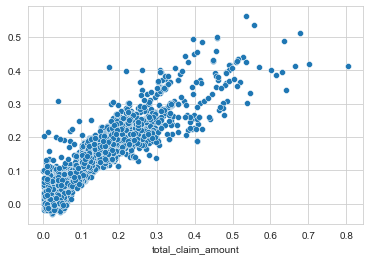

In [56]:
sns.scatterplot(y = y_pred, x = y_test)

## Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
def model_testing(X_train, X_test, y_train, y_test):
    scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
    for i in range(2,10): # The values of K. = 2,3,4,5,6,7,8,9
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    return scores


In [59]:
model_testing(X_train, X_test, y_train, y_test)

[0.5420401375336787,
 0.5944975388873617,
 0.6205496896710326,
 0.6307918752205925,
 0.6359048101978565,
 0.6384741549911164,
 0.6354361287392019,
 0.63521169094818]

Text(0, 0.5, 'R2')

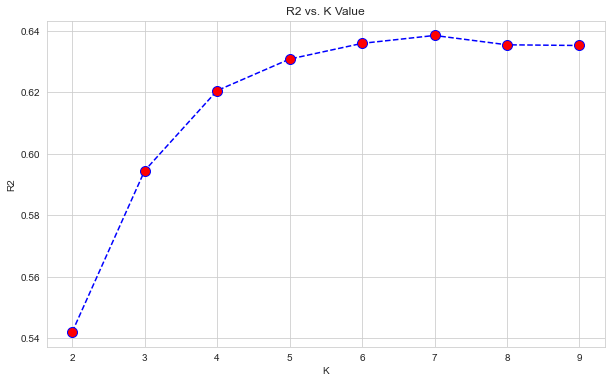

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10), model_testing(X_train, X_test, y_train, y_test), color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

## You can check also the MLPRegressor for this task!


In [61]:
from sklearn.neural_network import MLPRegressor

In [62]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [63]:
y_pred = regr.predict(X_test)
regr.score(X_test, y_test)

0.6841857537361566

<AxesSubplot:xlabel='total_claim_amount'>

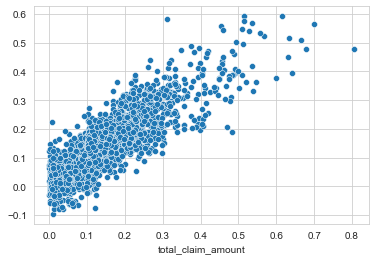

In [64]:
sns.scatterplot(y = y_pred, x = y_test)

In [65]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.04
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.05
The R2 of the model in the test set is: 0.68


In [95]:
# Overall, we get a better model with a linear regression than KNN regression or MLP regressor.

# Lab - Wednesday Afternoon | Random variable distributions

## Get the numerical variables from our dataset.

In [66]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,log_customer_lifetime_value
customer_id,,,,,,,
BU79786,2763.519279,56274,384.811147,69,32,5,7.924260
QZ44356,6979.535903,0,1131.464935,94,13,42,8.850738
AI49188,12887.431650,48767,566.472247,108,18,38,9.464008
WW63253,7645.861827,0,529.881344,106,18,65,8.941920
HB64268,2813.692575,43836,138.130879,73,12,44,7.942253


In [72]:
# Just to have the column "customer_lifetime_value" originally without the log transformation:
continuous_df["customer_lifetime_value"]=data["customer_lifetime_value"]
continuous_df=continuous_df.drop(["log_customer_lifetime_value"], axis=1)

In [73]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
customer_id,,,,,,
BU79786,2763.519279,56274,384.811147,69,32,5
QZ44356,6979.535903,0,1131.464935,94,13,42
AI49188,12887.431650,48767,566.472247,108,18,38
WW63253,7645.861827,0,529.881344,106,18,65
HB64268,2813.692575,43836,138.130879,73,12,44


## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

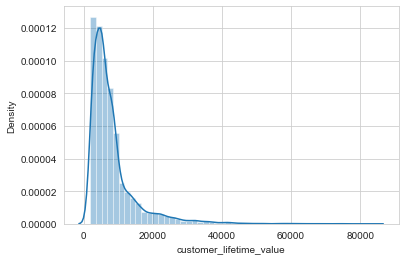

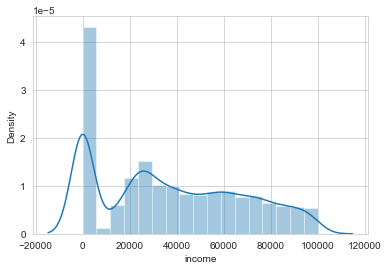

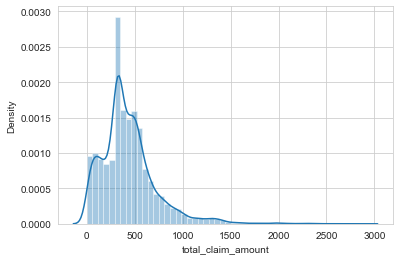

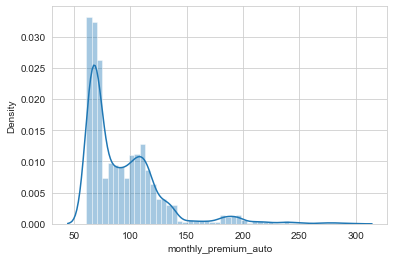

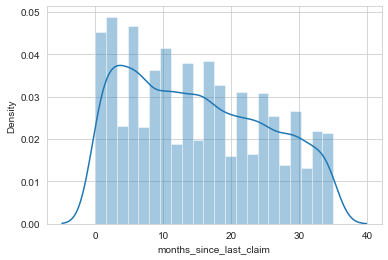

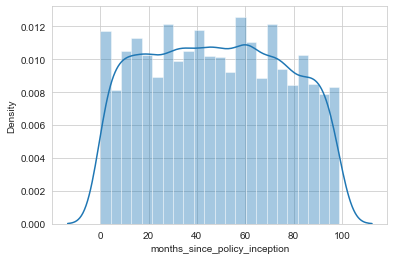

In [76]:
for i in continuous_df.columns:
    plt.subplot()
    sns.distplot(continuous_df[i])
    plt.show()

In [83]:
# If I run a .describe, we can see that the values of the categories are not negative. 
# Therefore, the fitting line might be misleading, since the plots don't have the origin at x=0.

# NOTE: I have decided to include months_since_last_claim and months_since_inception as continuous variables, but not sure if they can be considered as such.
# For the sake of leaving that discussion aside for now, I will focus on customer_lifetime_value, income and monthly premium auto (total_claim_amount is the dependent variable). 

continuous_df.describe()

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,434.088794,93.219291,15.097000,48.064594
std,6870.967608,30379.904734,290.500092,34.407967,10.073257,27.905991
min,1898.007675,0.000000,0.099007,61.000000,0.000000,0.000000
25%,3994.251794,0.000000,272.258244,68.000000,6.000000,24.000000
50%,5780.182197,33889.500000,383.945434,83.000000,14.000000,48.000000
75%,8962.167041,62320.000000,547.514839,109.000000,23.000000,71.000000
max,83325.381190,99981.000000,2893.239678,298.000000,35.000000,99.000000


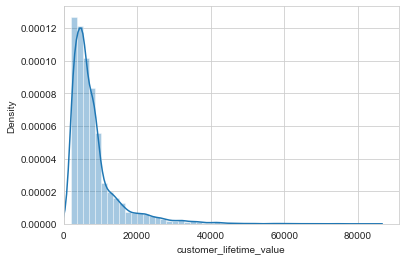

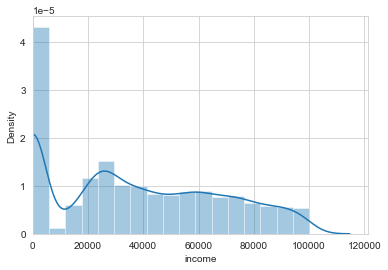

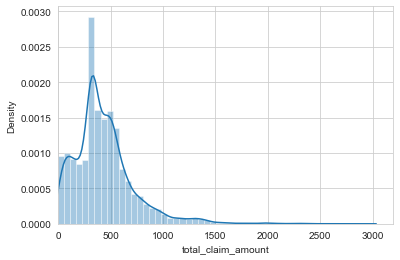

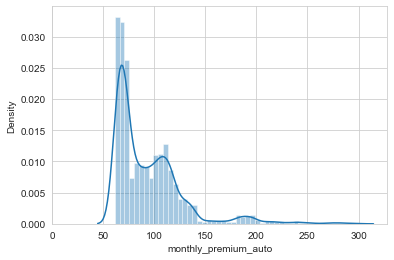

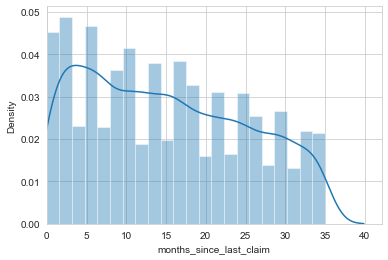

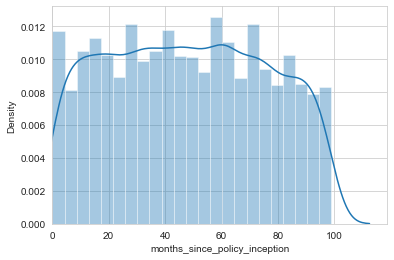

In [81]:
# Let's try to plot the same categories, but with origin at x=0:

for i in continuous_df.columns:
    plt.subplot()
    sns.distplot(continuous_df[i]).set(xlim=0)
    plt.show()

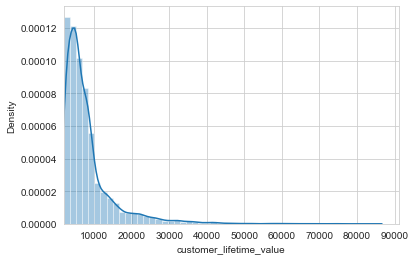

In [89]:
# It might be that customer_lifetime_value, income and monthly_premium_auto have a distribution more similar to exponential than normal.
# I'll try a last set of plots, this time with origin at their min values, for customer_lifetime_value and monthly_premium_auto:

plt.subplot()
sns.distplot(continuous_df["customer_lifetime_value"]).set(xlim=1898.007675)
plt.show()


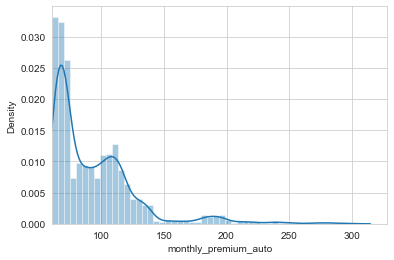

In [90]:
plt.subplot()
sns.distplot(continuous_df["monthly_premium_auto"]).set(xlim=61.000000)
plt.show()

## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [92]:
# revising skewness:

skew_df(continuous_df)

the skew of customer_lifetime_value is: 3.032280259929985
the skew of income is: 0.28688727581189166
the skew of total_claim_amount is: 1.7149658097209557
the skew of monthly_premium_auto is: 2.1235464499475345
the skew of months_since_last_claim is: 0.2785863118107981
the skew of months_since_policy_inception is: 0.040164961597799524


In [93]:
# I'll perform a log transformation and box-cox transformation in customer_lifetime_value and monthly_premium_auto:

In [94]:
continuous_transf=continuous_df

In [97]:
continuous_transf["log_customer_lifetime_value"] = list(map(log_transfom_clean_, continuous_df["customer_lifetime_value"]))

In [98]:
continuous_transf["log_total_claim_amount"] = list(map(log_transfom_clean_, continuous_df["total_claim_amount"]))

In [126]:
# Now, Box-Cox transformation:
from scipy import stats

continuous_transf["boxcox_customer_lifetime_value"]=continuous_df["customer_lifetime_value"]

fitted_data, fitted_lambda = stats.boxcox(continuous_transf["boxcox_customer_lifetime_value"])
fitted_data.shape

(9134,)

In [127]:
print(f"Lambda value used for Transformation: {fitted_lambda}")
fitted_data

Lambda value used for Transformation: -0.3460077279198611


array([2.70383943, 2.75492635, 2.78077243, ..., 2.76206241, 2.75839723,
       2.70016535])

In [123]:
fitted_data2, fitted_lambda2 = stats.boxcox(continuous_transf["total_claim_amount"])
print(f"Lambda value used for Transformation: {fitted_lambda}")


Lambda value used for Transformation: 0.4718167582845637


In [125]:
fitted_data2

array([33.03575151, 56.3576136 , 40.07178941, ..., 47.26372572,
       44.22514655, 32.37310739])

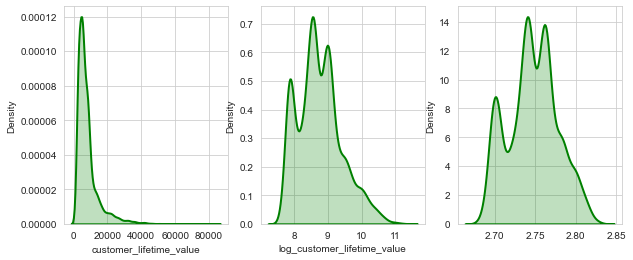

In [141]:
# creating axes to draw plots 
fig, ax = plt.subplots(1, 3) 
  
# plotting original, log and box-cox transformated-data:

sns.distplot(continuous_transf["customer_lifetime_value"], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "customer_lifetime_value", color ="green", ax = ax[0]) 
  
sns.distplot(continuous_transf["log_customer_lifetime_value"], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "log_customer_lifetime_value", color ="green", ax = ax[1]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "fitted_data", color ="green", ax = ax[2]) 
    

  
# rescaling the subplots 
fig.set_figheight(4) 
fig.set_figwidth(10) 

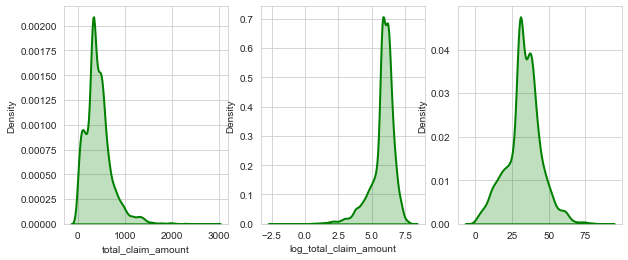

In [142]:
# creating axes to draw plots 
fig, ax = plt.subplots(1, 3) 
  
# plotting original, log and box-cox transformated-data:

sns.distplot(continuous_transf["total_claim_amount"], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "customer_lifetime_value", color ="green", ax = ax[0]) 
  
sns.distplot(continuous_transf["log_total_claim_amount"], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "log_customer_lifetime_value", color ="green", ax = ax[1]) 
  
sns.distplot(fitted_data2, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "fitted_data", color ="green", ax = ax[2]) 
    

  
# rescaling the subplots 
fig.set_figheight(4) 
fig.set_figwidth(10) 